In [ ]:
%matplotlib nbagg
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint
import time
import qcodes as qc
from qcodes.loops import Loop
import qcodes.instrument_drivers
import Keithley_2400 as keithley
import Keysight_34465A as keymulti
import Agilent_33500B as keysource
import BILTv2 as mod_source
import logging
import ctypes
import time
timestr = time.strftime("%Y%m%d_%H%M%S")
# logging.basicConfig(filename='example.log',level=logging.INFO)


import Holzworth_Final as holz

import LeCroy_16bit


#qc.halt_bg()



In [2]:
lcr = LeCroy_16bit.LCR('lcr3','USB0::0x05FF::0x1023::3515N50694::INSTR')

Connected to: LECROY HDO4054A (serial:LCRY3515N50694, firmware:8.5.0) in 0.04s


In [3]:
gate_9=keysource.Agilent_33500B('gate9', 'GPIB0::14::INSTR', channel=1) #RF TRI

Connected to: Agilent Technologies 33522B (serial:MY52814732, firmware:3.05-1.19-2.00-52-00) in 0.06s


In [4]:
gate_9.offset.set_step(0.02) #largest changed allowed per set call; 0.01
gate_9.offset.set_delay(0.3) #delay per set call; 0.3
gate_9.amplitude.set_step(0.005) #largest changed allowed per set call; 0.01
gate_9.amplitude.set_delay(0.3) #delay per set call; 0.3

In [5]:
fet_4=mod_source.BILT_BE101('fet4','GPIB0::5::INSTR','1')

Connected to: 2101 "ITEST BE2101CC/12V 200mA DC-SOURCE/SN03-027\03-027 LC1345 VL438\235" (serial:None, firmware:None) in 0.03s


In [6]:
fet_4.modv.set_step(0.05) #largest changed allowed per set call; 0.01
fet_4.modv.set_delay(0.3) #delay per set call; 0.3

In [7]:
fet_2=mod_source.BILT_BE101('fet2','GPIB0::5::INSTR','2')

Connected to: 2101 "ITEST BE2101CC/12V 200mA DC-SOURCE/SN03-027\03-027 LC1345 VL438\235" (serial:None, firmware:None) in 0.03s


In [8]:
fet_2.modv.set_step(0.05) #largest changed allowed per set call; 0.01
fet_2.modv.set_delay(0.3) #delay per set call; 0.3

In [16]:
source_5=keysource.Agilent_33500B('source5', 'GPIB0::14::INSTR', channel=2)

Connected to: Agilent Technologies 33522B (serial:MY52814732, firmware:3.05-1.19-2.00-52-00) in 0.03s


In [17]:
source_5.offset.set_step(0.005) #largest changed allowed per set call; 0.01
source_5.offset.set_delay(0.3) #delay per set call; 0.3

In [9]:
Holz = holz.HS9004A(name = 'Holz')

Syntax: "Name.ch{}_Parameter('Parameter_Value')" 
 Parameters: "Frequency, Power, Phase, Output (1 or 0 Boolean), Temperature (get only)"


In [7]:
Holz.close()

In [10]:
Holz.ch3_pwr(-20) #RF, with additional 20dB ta output and 50dB in fridge
Holz.ch4_pwr(0.2) #LO

In [11]:
Holz.ch3_freq(620)#628-630, 630.5 best
Holz.ch4_freq(620)

In [63]:
Holz.ch3_output(0)
Holz.ch4_output(0)

In [ ]:
#ch1 I
#ch3 Q
#ch2 square

# Reflectometry

In [18]:
lcr.reflectometry.frequency(83)

In [19]:
lcr.reflectometry.start(0.4)
lcr.reflectometry.end(0.5)

In [20]:
lcr.reflectometry.I_DC(1)
lcr.reflectometry.Q_DC(1)

In [21]:
lcr.reflectometry.average(200)

In [22]:
lcr.reflectometry.curvedata.prepare_curvedata() # 
#lcr.reflectometry.setup_AWG(gate_9) # make sure limits are set!

In [23]:
data=qc.Measure(lcr.reflectometry.curvedata).run(name='12mK_Cell457_RF_617MHz_-90dBm_VSD_0mV_Gate9_0p4V-0p5mV_200avg_SR560_ACCpl_5e2Amp')

DataSet:
   location = 'data/2018-01-31/#008_12mK_Cell457_RF_617MHz_-90dBm_VSD_0mV_Gate9_0p4V-0p5mV_200avg_SR560_ACCpl_5e2Amp_16-54-21'
   <Type>   | <array_id>                   | <array.name> | <array.shape>
   Setpoint | Sweep_set                    | Sweep        | (6024,)
   Measured | lcr3_reflectometry_I         | I            | (6024,)
   Measured | lcr3_reflectometry_Q         | Q            | (6024,)
   Measured | lcr3_reflectometry_magnitude | magnitude    | (6024,)
   Measured | lcr3_reflectometry_phase     | phase        | (6024,)
acquired at 2018-01-31 16:54:28


<IPython.core.display.Javascript object>


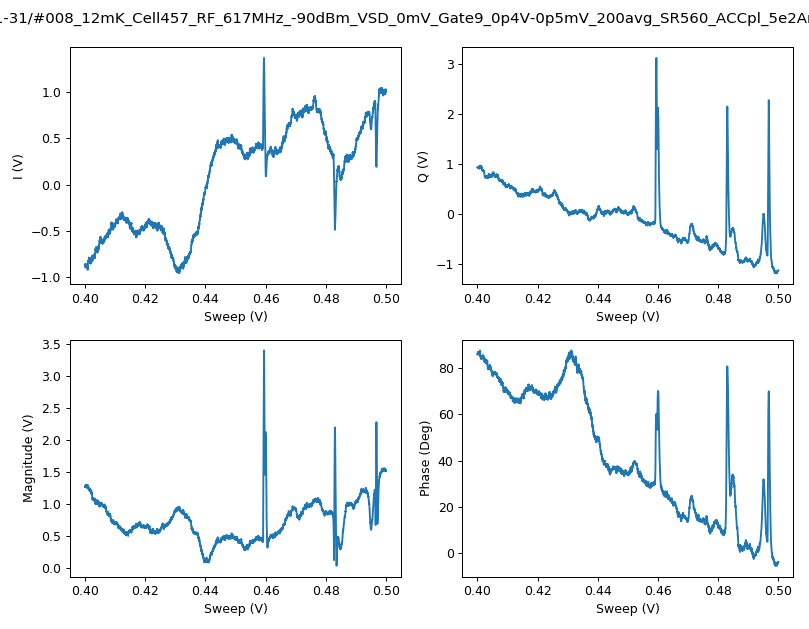

In [24]:
qc.MatPlot(data.lcr3_reflectometry_I, data.lcr3_reflectometry_Q, data.lcr3_reflectometry_magnitude, data.lcr3_reflectometry_phase,subplots=(2,2))

# Coulomb scan

In [25]:
lcr.reflectometry.frequency(83)

In [26]:
lcr.reflectometry.start(0.4)
lcr.reflectometry.end(0.5)

In [27]:
lcr.reflectometry.I_DC(1)#20
lcr.reflectometry.Q_DC(1)#20

In [28]:
lcr.reflectometry.average(200)

In [29]:
lcr.clear_message_queue()

In [30]:
lcr.reflectometry.curvedata.prepare_curvedata() # 
#lcr.reflectometry.setup_AWG(gate_9) # make sure limits are set!

In [31]:
loop=qc.Loop(source_5.offset.sweep(-10e-3,10e-3,num=101),delay=0.01).each(lcr.reflectometry.curvedata)


#create data-set
data = loop.get_data_set(name='12mK_Cell457_RF_617MHz_-90dBm_VSD_-10-10mV_Gate9_0p4-0p5V_200avg_SR560_ACCpl_5e2Amp')


<IPython.core.display.Javascript object>


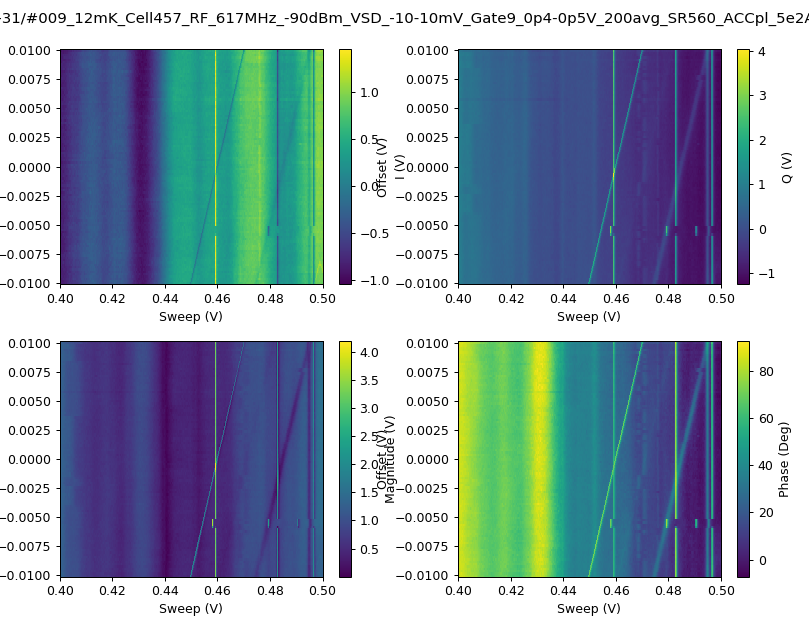

Started at 2018-01-31 16:57:48
DataSet:
   location = 'data/2018-01-31/#009_12mK_Cell457_RF_617MHz_-90dBm_VSD_-10-10mV_Gate9_0p4-0p5V_200avg_SR560_ACCpl_5e2Amp_16-57-45'
   <Type>   | <array_id>                   | <array.name> | <array.shape>
   Setpoint | source5_offset_set           | offset       | (101,)
   Setpoint | Sweep_set                    | Sweep        | (101, 6024)
   Measured | lcr3_reflectometry_I         | I            | (101, 6024)
   Measured | lcr3_reflectometry_Q         | Q            | (101, 6024)
   Measured | lcr3_reflectometry_magnitude | magnitude    | (101, 6024)
   Measured | lcr3_reflectometry_phase     | phase        | (101, 6024)
Finished at 2018-01-31 17:11:20


In [32]:
plot=qc.MatPlot(data.lcr3_reflectometry_I, data.lcr3_reflectometry_Q, data.lcr3_reflectometry_magnitude, data.lcr3_reflectometry_phase,subplots=(2,2))
data = loop.with_bg_task(plot.update, plot.save).run()

In [33]:
source_5.offset(0)
